# COGS 118A - Final Project

# Prediction of Housing Price Based on Features of the Houses

## Group members

- Lingxi Li
- Jianghua Lu
- Yvonne Luo
- Man Kui Sit
- Robert Zhang

# Abstract 

The goal of our project is to estimate the sale price for different houses based on their features and conditions. The dataset we chose contains sample houses with different conditions and their actual final sale price. These condition and features measurements include housing location, area, home appliances (AC, pool, utilities), time measurements (the year built, the year sold), etc.. We went through some data preprocessing to remove missing data and we used strategies such as one-hot-encoding to encode categorical data, so that all data could be fit for statistical analysis. We also did some feature selection to only include features that are more relevant and had more variance. We developed several different models, including logistic regression, neural network, and random forest, to predict sale prices based on the house features. At the end, we chose the evaluation metrics, r squared and root mean squared error to evaluate the models’ performance by comparing the predicted sale price with the actual sale price. Our winning model is the random forest model determined by the highest r^2 value which indicates the variance explained by the regression line, and the lowest rmse, which indicates the error between the predicted and actual price.

# Background

The current global pandemic has changed so many aspects of people’s lives. From global circuit chip shortages to lack of daily life products, everything is making it harder for people to get back to their old, carefree lives. Other than the obvious threat of COVID virus, one impact the pandemic is throwing at our shoulder is that living costs are continuously rising. One particular example is house pricing. A combination of stimulus, low mortgage rate, and simple high demand for housing due to the nature of work-from-home are all tempting people to buy new houses<a name="house price reason"></a>[<sup>[1]</sup>](#reason). As house pricing keeps skyrocketing and driving daily living expenses to the roof, predicting house prices is becoming a very relevant problem. What factors are contributing to a huge house check, how are different factors weighted, and given various feature variables, is there a consistent and accurate method for predicting house prices? These are the questions being magnified under the current special time, and we look to address them with a machine learning approach. 
<br>
The idea of this project stems from an on-going Kaggle challenge<a name="house price pred"></a>[<sup>[2]</sup>](#pred) with over 4000 participants. This competition originated back in 2016, but the data is still extremely valuable because the feature set is extensive and contains every possible description of a house. Similar work in the related area from Varma et al. also addresses the problem of predicting house prices using regression techniques<a name="other paper"></a>[<sup>[3]</sup>](#paper). Our work aims at developing an effective regression model by comparing various different popular ones and tries to yield the most effective one.

# Problem Statement

The problem we are trying to solve is predicting housing price based on its condition and features(specific feature selection to be determined). Some examples of features include: Neighborhood(Physical locations within Ames city limits), LotArea(Lot size in square feet), Utilities(Type of utilities available), YearBuilt(Original construction date), etc. More detailed descriptions and definitions of features will be included in the data section. This problem is quantifiable because all measurements are either originally numerical or can be encoded numerically using strategies such as one-hot encoding; the problem is measurable because the final predicted result price can be directly compared to the actual price using the difference between the predicted and actual price, R^2, and Root Mean Square Error as the metrics; the problem is replicable because all the machine learning models can be selected, trained, and tested based on the data we found repeatedly in order to verify the result.

# Data

The dataset originates from an open source machine learning competition from Kaggle. In total it contains roughly 3000 data samples containing house sales in the past 20 years. The dataset contains extremely comprehensive all-around descriptions of every aspect of a house, some of which are even a bit repetitive. The information ranges from house overall dwelling type, house built material, and house condition, to minute details and walkway pavement material, basement height, or number of fireplaces. For the sake of our prediction, such exhaustive information is both conducive for the task, since the more informative details we have, the better our model is supposed to generalize. On the other hand, too many repetitive features might only add up to the training complexity, and even render our model hard to apply in a real world setting as it might be hard to gather all such information about a house. Thus, some extent of data selection and preprocessing is needed. Some repetitive features, such as road access and alley access type, can be combined into one. Some features like exterior finish material are broken up into two separate columns, one for only one material and another for multiple materials used. Such can also be combined into one. Some features, such as basement area, basement height, basement material, basement conditions, etc. are all descriptions of the basement and might be too detailed for the task. So we will use some data selection and preprocessing to trim them down into lower dimensionality.

Here we give some basic visualization of the raw data and postpone the actual data cleaning to later sections. The data can be divided into two major categories, numerical and categorical. Since the two types of data are inherently different in terms of preprocessing techinques, we generate different visualizations for them. 

First in figure below, we visualize the distribution of our final target, the house prices. We can observe that most house prices lie in the range around 200k USD. The overall distribution is also a descently shaped Gaussian. 
![House price distribution](./graphs/price_dist.png)

Below is the overall distribution visualization for each one of the numerical features in our dataset. This is a general visualization of all features. We can directly observe that some features, such as low quality finish, is predominated by one features. Features like this will contribution minimally to our final prediction and are candidates for removal. 
![numerical dist](./graphs/num_hist.png)

Another important aspect of the data is correlation. Since in the end we want to devise a regression model with respect to house price, correlation with house prices is of great importance. Below is a correlation heatmap with respect to all numerical features in place. Just by directly observing the correlations, some features already stand out in importance such as years built and number of rooms (in light color). Those darker features can be considered for removal later on. 
![correlation](./graphs/corr.png)

With respect to categorical features, we present a graph showing all the histograms as well. Similar to what we conclude with numerical features, those features that are predominatantly lying in one category are likely to make very minimal contribution to our regression task, hence considered for removal later on. 
![cat hist](./graphs/cat_hist.png)

**All related code for visualization is provided in data_processing_v2.ipynb notebook for space saving reasons**

# Proposed Solution

Our overall task is to predict future house prices based on current data. This is a traditional regression task. Our solution to the problem consists of two major parts, a feature selection step and a model selection step. We consider the feature selection part necessary because the dataset we are using contains a huge amount of observation variables. Some features are highly overlapping, such as dwelling style and dwelling type. A lot of repetitive features can be cut down to save computational cost, promote model simplicity, and also boost our model generality, since not all houses will have all the necessary features, thus posing a problem to deploy the model in real life. The second component of our solution is to develop a machine learning model so as to predict future house prices. A variety of regression models are suitable for the nature of our task. From the most basic least square solution to the trending deep neural network, each popular model has its own advantages. In our work, we wish to explore the differences between some of the most popular models, and seek to combine their performance for the best result. Some models to choose from include: logistic regression, which can be used as our benchmark because of its low complexity but high generality, random forest, boosting, and multi-layer perceptron. Random forest has been proved to be one of the best performing algorithms with tabular style data. Boosting represents the power of combining multiple models for the best performance. For neural networks, we choose multi-layer perceptron because our tabular style data doesn’t really possess the feature locality property needed by models such as Convolutional neural networks. We will evaluate all these models using both R^2 and Root Mean Square Error (RMSE). We wish to select the best model out of them and come up with the best solution. We will be using sklearn models and metrics to approach this problem. 

# Evaluation Metrics

Since we are predicting future housing prices based on current data, we  implement a regression model. R^2, coefficient of determination, is a popular evaluation metric for goodness of fit when it comes to regression tasks. It is “the proportion of the variance in the dependent variable that is predictable from the independent variable”<a name="wiki"></a>[<sup>[4]</sup>](#wikinote). The value of R^2 ranges from 0 to 1 (R^2 of a model could be less than zero/negative, which is worse than R^2=0 that’s always predicting the mean value of y), and a R^2 value of 1 is the best scenario when the model gives perfect predictions. In the context of our project, we interpret R^2 as the proportion of the variance in the target variable (selling prices) that can be explained by the features (utilities, house style, year built, etc.). 

$$
R^2 = 1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\overline{y}_i)}
$$

Another metric we are using is Root Mean Squared Error (RMSE), the standard deviation of the residuals. In the context of our project, we take the square root of the average of squared differences between predicted price and actual price. Since RMSE penalizes large errors, it’s very sensitive to outliers.

$$
RMSE = \sqrt{\frac{1}{n}\sum{(y_j-\hat{y}_j)^2}}
$$

Both metrics will provide crucial information regarding whether the model fits our data, while R^2 is scaled in percentage term, RMSE is in abosolute term so the value of RMSE will probably look large since we have big numbers.

# Results



### Subsection 1: Planning and Appropriate Models

Since our problem is a price prediction task, regression models are most appropriate. What we will do is develop a model that predicts housing sale prices based on different features of the houses.

We have chosen several different models and plan on comparing their performance to get the best model:
1. Logistic Regression
2. Neural Network
3. Random Forest

### Subsection 2: Data Visualization & Feature Selection

Based on the observations we made in our data introduction section, some extensive data cleaning and selections are performed. Our selection is mainly from statisical perspective. The first cleaning procedure is a variance threshold. As mentioned above, features with really low variance or those that lie predominantly in one feature category is unlikely to be of any use to our regression since they cannot be used to differentiate two data points. We choose a variance threshold of 0.1 meaning that we will be dropping the 10% of features in variance ranking. 'BsmtHalfBath', 'KitchenAbvGr' are the features dropped here. The next selection criterion is similar to variance. Correlation is a similar statistic attribute. We choose to drop the last 20% in terms of correlation. 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BedroomAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold' are the features dropped. After we are done with such feature selection, a visualization with respect to sale price, our final prediction target, is given below. 
![cat hist](./graphs/num_regression.png)


A similar data cleaning procedure is done for categorical features. For those features 90% of which lie in one category are removed from prediction. 'Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature' are the set of features removed. 

'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition'
       
are the remaining features that we will use for final task. For categorical features, we will transform them into numerical ones by using onehot encoding. 

**All related code for data cleaning is provided in data_processing_v2.ipynb notebook for space saving reasons**

The final cleaned dataset:

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('data/cleaned_data.csv').iloc[:, 1:]
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']
data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7.0,2003.0,2003.0,196.0,706.0,150.0,856.0,856.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,80.0,9600.0,6.0,1976.0,1976.0,0.0,978.0,284.0,1262.0,1262.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,68.0,11250.0,7.0,2001.0,2002.0,162.0,486.0,434.0,920.0,920.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,9550.0,7.0,1915.0,1970.0,0.0,216.0,540.0,756.0,961.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260.0,8.0,2000.0,2000.0,350.0,655.0,490.0,1145.0,1145.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,6.0,1999.0,2000.0,0.0,0.0,953.0,953.0,953.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,85.0,13175.0,6.0,1978.0,1988.0,119.0,790.0,589.0,1542.0,2073.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,66.0,9042.0,7.0,1941.0,2006.0,0.0,275.0,877.0,1152.0,1188.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,68.0,9717.0,5.0,1950.0,1996.0,0.0,49.0,0.0,1078.0,1078.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Subsection 3: Baseline Model - Repeated KFold Logistic Regression


Our chosen base model is a logistic regression. Since our dataset contains few observations for a machine learning task, we decided to use repeated k-folds to improve the performance of our model. We decided to use 5 folds and 5 repeats as parameters for the repeated k-fold. We have evaluated each fold's performance on the test data and showed the maximum r2 score and minimum root mean squared error. A visualization of the relationship between the actual price and predicted price is also included below.

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
r2_results = []
rmse_results = []
for train_index, test_index in rkf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    sns.regplot(x=y_test, y=y_pred)
    rsquared_score = r2_score(y_test, y_pred)
    rmse_score = mean_squared_error(y_test, y_pred) ** (1/2)
    r2_results.append(rsquared_score)
    rmse_results.append(rmse_score)
max(r2_results), min(rmse_results)

From the visualization above, we can see that there are a few outliers that our modeled failed to predict accurately, while most predictions are clustered around the regression line. However, it seems that our model tends to predict a price that is lower than the actual price as a genenral trend. The prediction is more accurate for cheaper houses than more expernsive houses. From the above metrics, we can see that the best performing model has r2 of 0.55 and rmse of 50472, which is not ideal. We have tried other models in the following sections.

### Subsection 4: Prediction Based On Neural Network (Keras)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [30]:
model = Sequential()
model.add(Dense(210,activation='relu', input_dim=210))
model.add(Dense(150,activation='relu'))
model.add(Dense(90,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(1,activation='linear'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 210)               44310     
_________________________________________________________________
dense_12 (Dense)             (None, 150)               31650     
_________________________________________________________________
dense_13 (Dense)             (None, 90)                13590     
_________________________________________________________________
dense_14 (Dense)             (None, 60)                5460      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 61        
Total params: 95,071
Trainable params: 95,071
Non-trainable params: 0
_________________________________________________________________


In [31]:
# define metrics
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

def r2_score(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

model.compile(loss='mean_squared_error' , optimizer='adam', metrics=[rmse, r2_score])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
history = model.fit(X_train.values, y_train.values, epochs=200, batch_size=128, validation_split=0.2)

Train on 782 samples, validate on 196 samples
Epoch 1/200
782/782 [==============================] - 0s 247us/step - loss: 38215720509.5448 - rmse: 179764.8214 - r2_score: -5.6502 - val_loss: 37042993862.5306 - val_rmse: 178659.8253 - val_r2_score: -6.2335
Epoch 2/200
782/782 [==============================] - 0s 62us/step - loss: 36585876419.7647 - rmse: 175616.0061 - r2_score: -5.3286 - val_loss: 34456170496.0000 - val_rmse: 171793.5443 - val_r2_score: -5.7284
Epoch 3/200
782/782 [==============================] - 0s 62us/step - loss: 32841128014.5678 - rmse: 165395.5255 - r2_score: -4.5685 - val_loss: 28604565127.8367 - val_rmse: 154935.4828 - val_r2_score: -4.5847
Epoch 4/200
782/782 [==============================] - 0s 68us/step - loss: 25531989266.9872 - rmse: 142590.9101 - r2_score: -3.3641 - val_loss: 18206787500.4082 - val_rmse: 119309.9133 - val_r2_score: -2.5476
Epoch 5/200
782/782 [==============================] - 0s 62us/step - loss: 17329462499.8465 - rmse: 101812.9923 

In [34]:
y_pred = model.predict(X_test.values)

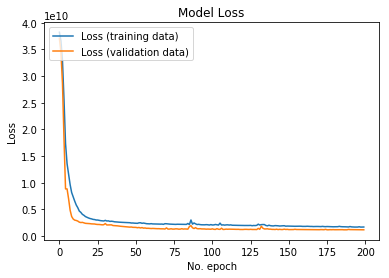

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# display loss
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc='upper left')
plt.show()

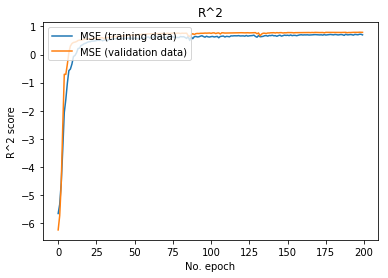

In [36]:
# display R^2
plt.plot(history.history['r2_score'], label='MSE (training data)')
plt.plot(history.history['val_r2_score'], label='MSE (validation data)')
plt.title('R^2')
plt.ylabel('R^2 score')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

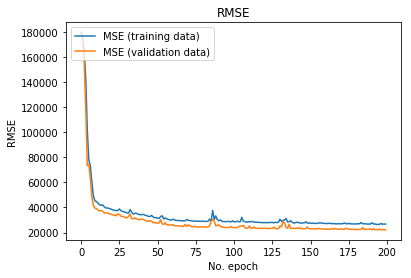

In [37]:
# display RMSE
plt.plot(history.history['rmse'], label='MSE (training data)')
plt.plot(history.history['val_rmse'], label='MSE (validation data)')
plt.title('RMSE')
plt.ylabel('RMSE')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

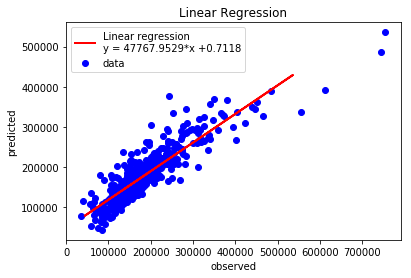

In [38]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(y_test.values.reshape(-1,1), y_pred)  
y_fit = regressor.predict(y_pred) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(y_test, y_pred, color='blue', label= 'data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

In [39]:
import sklearn.metrics, math
print("R^2 score (R^2):                 %f" % sklearn.metrics.r2_score(y_test,y_pred))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred)))

R^2 score (R^2):                 0.792801
Root mean squared error (RMSE): 39001.640173


### Subsection 5: Random Forest Regressor

We also trained a random forest regressor. Random forest is well known for its strong performance and robustness in terms of generalization. Since our dataset is very limited, we make use of extensive cross validation, repeated kfolds, and grid search for hyperparameters tuning. We choose a kfold and repeated kfold number to be 5 and 5. For parameter searching, the choices are from n_estimators, whose range is from 100, 300, 500; max_depth, whose range is from 10, 30, 50; min_samples_split, the range of which is 2, 5, 10; and  min_samples_leaf from 1, 2, 4. The set of parameters is chosen with some heuristics and some basic model training. 

The best performing model in a Root Mean Squared Error sense is max_depth: 50, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 100, with a final performance of 28591.84. The corresponding r2 is 0.8536.

We also show some visualization with respect to each parameter. Below is a plot over all four parameters we searched on. And each plot is a score vs parameters. From the plot, we can see that n_estimators has a positive correlation with score, whereas max depth caps out at around 30. min_samples split and min samples leaf, on the other hand, have a negative correlation. Adding them all explains the best parameters we have obtained in the end. 
![rf params](./graphs/rf_parms.png)

**Detail code can be found in data_processing_v2**

### Subsection 6: Evaluation of Models Based On Metrics

In [3]:
performance = pd.DataFrame([['logistic regression', 0.5508752109402484, 50472.846414192696], ['neural network', 0.792801, 39001.640173], ['random forest', 0.8536418696296165, 28591.839739807663]], columns=['Model', 'R2', 'RMSE'])
performance

,Model,R2,RMSE
0,logistic regression,0.550875,50472.846414
1,neural network,0.792801,39001.640173
2,random forest,0.853642,28591.839740


According to the results above, the model with the best performance is the random forest regressor with parameters max_depth: 50, min_samples_leaf: 1, min_samples_split: 5, n_estimators: 100. It yields the lowest root mean squared error and highest r2, 28591.84 and 0.8536.

# Discussion

### Interpreting the result

Based on the final evaluation, random forest regressor is the strongest performing model we obtain. This is a perfect example of the robustness of random forest in the field of tabular style data. The paramter grid search we did, even though not extensive, but did converge to a point where model performance is good enough. 

Compared to our baseline model logistic regression, the performance advantange is obvious, and this can be expected. For the number of features we have, even though we have done extensive data processing to throw again irrelevant features, is still massive. Logistic regression might not be able to absorb all the information, and it is now feasible that a linear classifier can fit to such high dimensionality data. On the other hand, random forest is well-known to be strong with high dimensionality data, as long as it is well regularized. Thus, the performance gain is expected.

With repect our multi-layer perceptron, random forest still scores a win. This is likely due to the simple structure of our neural network. With some further parameter tuning, we might be able to obtain a solid performing model, but with the random forest regressor performing as it is, it is hard to argue for a super complex model. Another possible reason for the lack of performance for neural networks is potentially that the size of our dataset is too limited. Compared to our number of features, the dataset we have is just not large enough for every feature to be well covered. Therefore, it is possible that neural cannot take in enough information to learn anything meaningful. 

Overall, our random forest regressor gives a RMSE of 28591.84. Considering that the average house sale price in our dataset is around 200k, that is around 10% error rate, which is a really solid performance. Therefore, our model is a solid predictor for the current house price market. 

### Limitations

Our dataset is pretty small to be used as a machine learning dataset. Having more data is likely to yield a more reliable prediction. The dataset also contains numerous features of houses, which led to a potentially too complicated model. If we had more time, trying to use more specific encoding strategies and combine models may improve the prediction.

The data we found contained houses in different neighborhoods in San Diego, which can lead to a significant difference between housing prices. If we had more data and could develop a model for each of the neighborhoods separately, we may find a better prediction model. If we had time to design an evaluation system for the features of the houses, using the evaluations directly may have resulted in a better model. However, we had limited time and we tried our best to find the best model we could.

### Ethics & Privacy

Our research question and hypothesis are designed to explore the house pricing dataset and train a model to make good predictions based on some features. The dataset we use is a public, open-source dataset on Kaggle, which gives us the right to perform data analysis and modeling on it. The dataset is anonymized so we will not violate any personal rights regarding the properties. 

We have monitored the biases in the dataset during our project. The dataset is collected by Kaggle is might be biased and thus not representative due to various factors, for instance, missing values. We address this problem during our data cleaning process, remove a few features due to overlap during feature selection, and carry out feature encoding to enable statistical analysis. We have ensured our visualizations, summary statistics, and reports are honestly representing the underlying data.

We have monitored the biases during our data analysis and modeling. The bias in the model might lead to biased results, and we have ensured the variables in the model are not unfair or discriminatory in any way. We have explained the decisions made based our models in an understandable way. 

Our project repository is open to the COGS 118A staff members for any investigation and has undergone peer review processes during the project.

### Conclusion

In this project, we did a house price analysis and tried to obtain a good house price predictor. This is extremely relevant as house prices are soaring to the highest point in decades with no end in sight. We performed extensive data visualization and analysis. Through careful feature selection, we prepared our data for three popular regression algorithms: logistic regression, random forest, and neural networks. Random forest stands out as the best performing model among all three. With the solid performance, we believe that our model is a good predictor to be used for predicting house prices in the current market. However, considering the limited number of data we have, in the future, more data samples might give us an even better understanding of house markets, and potentially a better performing neural network. 

# Footnotes
<a name="house price reason"></a>1.[^](#reason): Why House prices surged as the COVID-19 pandemic took hold. Dallasfed.org. (n.d.). Retrieved April 24, 2022, from https://www.dallasfed.org/research/economics/2021/1228.aspx  <br> 

<a name="house pred"></a>2.[^](#pred): House prices - advanced regression techniques. Kaggle. (n.d.). Retrieved April 24, 2022, from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description  <br> 

<a name="other paper"></a>3.[^](#paper): A. Varma, A. Sarma, S. Doshi and R. Nair, "House Price Prediction Using Machine Learning and Neural Networks," 2018 Second International Conference on Inventive Communication and Computational Technologies (ICICCT), 2018, pp. 1936-1939, doi: 10.1109/ICICCT.2018.8473231.  <br> 

<a name="wikiznote"></a>4.[^](#wiki):Wikimedia Foundation. (28 May 2022). Coefficient of determination. *Wikipedia.*
https://en.wikipedia.org/wiki/Coefficient_of_determination<br> 